In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
data = pd.read_csv(r"D:\Pandas Datasets\adult_income_dataset\adult.csv")

In [120]:
data['income']

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [121]:
#Find Shape of Our Dataset (Number of Rows And Number of Columns)
print("Number od Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number od Rows: 48842
Number of Columns: 15


In [122]:
#Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [123]:
#Fetch Random Sample From the Dataset (50%)
data.sample(frac=0.50)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
21063,67,?,182378,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,9386,0,60,United-States,>50K
9223,36,Self-emp-inc,176900,Some-college,10,Married-spouse-absent,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
10682,18,Private,178759,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,15,United-States,<=50K
47900,26,Self-emp-not-inc,231714,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
48626,18,Private,347336,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2776,53,Private,816750,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,72,United-States,>50K
36927,19,?,117201,Some-college,10,Never-married,?,Own-child,White,Male,0,0,22,United-States,<=50K
16587,26,Private,193945,Assoc-acdm,12,Never-married,Tech-support,Not-in-family,White,Male,0,0,45,United-States,<=50K
20019,27,Private,588905,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [124]:
#Check Null Values In The Dataset
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<Axes: >

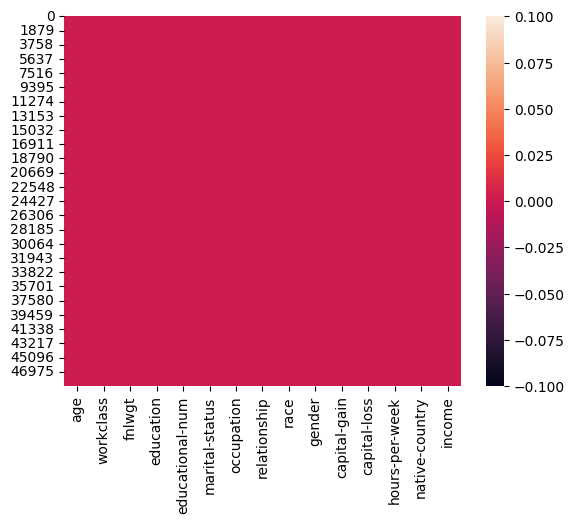

In [125]:
#visualizing null values using seaborn heatmap
sns.heatmap(data.isnull())

In [126]:
#Perform Data Cleaning [ Replace '?' with NaN ]
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [127]:
import numpy as np
data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)
data['native-country'] = data['native-country'].replace('?',np.nan)

In [128]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [129]:
#Drop all The Missing Values
per_missing = data.isnull().sum()*100/len(data)
per_missing 


age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [130]:
data.dropna(how='any',inplace=True)

In [131]:
data.shape

(45222, 15)

In [132]:
#Check For Duplicate Data and Drop Them
dup = data.duplicated().any()

In [133]:
print("Are there any duplicates",dup)

Are there any duplicates True


In [134]:
data = data.drop_duplicates()

In [135]:
data.shape

(45175, 15)

In [136]:
45222 - 45175 

47

In [137]:
#overall statistics
data.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45175.000000,45175,4.517500e+04,45175,45175.000000,45175,45175,45175,45175,45175,45175.000000,45175.000000,45175.000000,45175,45175
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33262,NaN,14770,NaN,21042,6010,18653,38859,30495,NaN,NaN,NaN,41256,33973
mean,38.556170,NaN,1.897388e+05,NaN,10.119314,NaN,NaN,NaN,NaN,NaN,1102.576270,88.687593,40.942512,NaN,NaN
std,13.215349,NaN,1.056524e+05,NaN,2.551740,NaN,NaN,NaN,NaN,NaN,7510.249876,405.156611,12.007730,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173925e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783120e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379030e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [138]:
# Drop The Columns education-num, capital-gain, and capital-loss
# education and education-num is same, capital-gain and capital-loss has more than 75% null values

data = data.drop(['educational-num','capital-gain','capital-loss'],axis=1)

In [139]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [140]:
#Univeriate Analysis
# What Is The Distribution of Age Column?

data['age'].describe()

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

<Axes: >

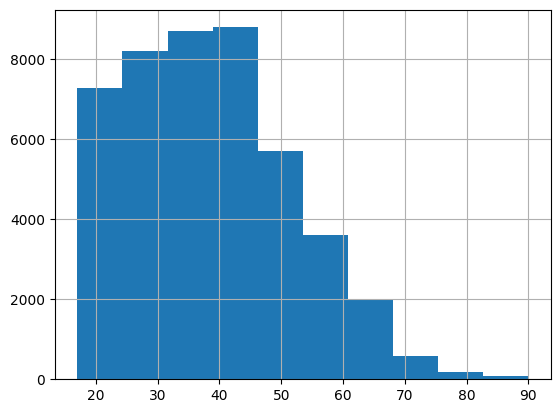

In [141]:
data['age'].hist()

In [142]:
# Find Total Number of Persons Having Age Between 17 To 48 (Inclusive) Using Between Method
sum(data['age'].between(17,48))

34858

In [143]:
#What is The Distribution of Workclass Column?
data['workclass'].describe()

count       45175
unique          7
top       Private
freq        33262
Name: workclass, dtype: object

<Axes: >

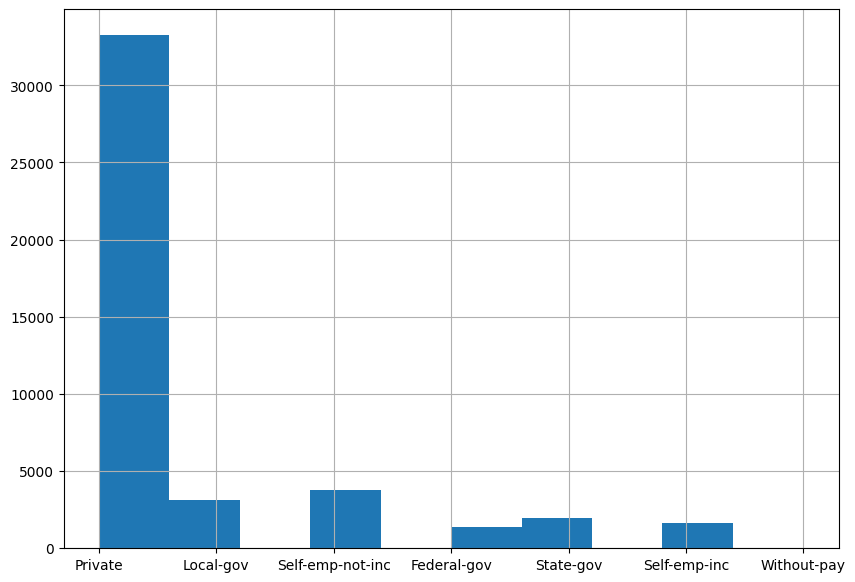

In [144]:
plt.figure(figsize=(10,7))
data['workclass'].hist()

In [145]:
#How Many Persons Having Bachelors and Masters Degree?
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [146]:
filter1 = data['education']=='Bachelors'
filter2 = data['education']=='Masters'
len(data[filter1 | filter2])

10072

In [147]:
#another method
data['education'].isin(['Bachelors','Masters']).sum()

np.int64(10072)

<Axes: xlabel='income', ylabel='age'>

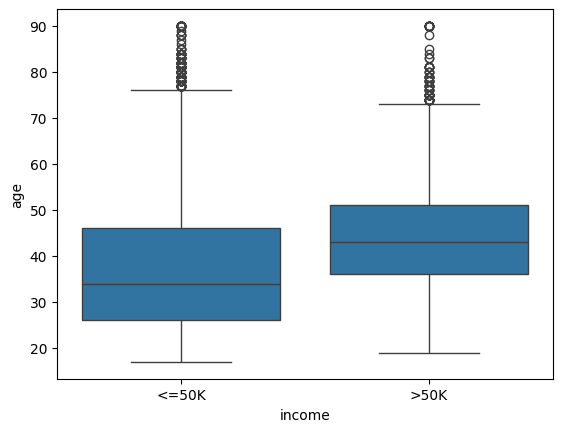

In [148]:
#Bivariate Analsis
data.columns
sns.boxplot(x='income',y='age',data=data)

In [149]:
#Replace Salary Values With 0 and 1
data['income'].value_counts()

income
<=50K    33973
>50K     11202
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='count'>

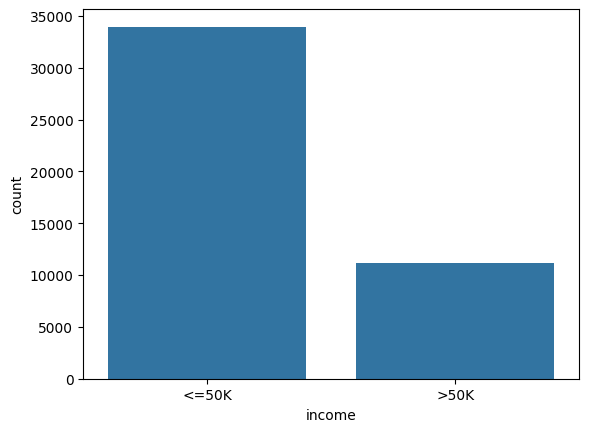

In [150]:
sns.countplot(x='income',data=data)

In [151]:
def salary_data(sal):
    if sal == '<=50K':
     return 0
    else: 
     return 1


In [152]:
data['encoded_income'] = data['income'].apply(salary_data)

In [153]:
data.head(1)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,encoded_income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0


In [154]:
#another method
data.replace(to_replace=['<=50K','>=50K'],value=[0,1],inplace=True)

In [155]:
data.head(1)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,encoded_income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0,0


In [159]:
#Which Workclass Getting The Highest Salary?
data.groupby('workclass')['encoded_income'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Private             0.217816
Without-pay         0.095238
Name: encoded_income, dtype: float64

In [162]:
#How Has Better Chance To Get Salary greater than 50K Male or Female?
data.groupby('gender')['encoded_income'].mean().sort_values(ascending=False)

gender
Male      0.312609
Female    0.113692
Name: encoded_income, dtype: float64

In [163]:
# Covert workclass Columns Datatype To Category Datatype
data['workclass'].dtype

dtype('O')

In [164]:
data['workclass'] = data['workclass'].astype('category')

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45175 non-null  int64   
 1   workclass       45175 non-null  category
 2   fnlwgt          45175 non-null  int64   
 3   education       45175 non-null  object  
 4   marital-status  45175 non-null  object  
 5   occupation      45175 non-null  object  
 6   relationship    45175 non-null  object  
 7   race            45175 non-null  object  
 8   gender          45175 non-null  object  
 9   hours-per-week  45175 non-null  int64   
 10  native-country  45175 non-null  object  
 11  income          45175 non-null  object  
 12  encoded_income  45175 non-null  int64   
dtypes: category(1), int64(4), object(8)
memory usage: 4.5+ MB
